In [129]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouseDrug.csv"
clinical_trial_data_to_load = "clinicaltrial.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseDrugCSV=pd.read_csv(mouse_drug_data_to_load)
clinicalTrialCSV=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combinedCSV=mouseDrugCSV.merge(clinicalTrialCSV, on='Mouse ID', how='inner')

# Display the data table for preview
#mouseDrugDF.head(2)
#clinicalTrialDF.head(2)
#mouseDrugDF.columns
#Index(['Mouse ID', 'Drug'], dtype='object')
#clinicalTrialDF.columns
combinedCSV

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [66]:
mouseDrugCSV.count()

Mouse ID    250
Drug        250
dtype: int64

## Tumor Response to Treatment

In [67]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumorVolumeCSV=combinedCSV[['Drug','Timepoint','Tumor Volume (mm3)']]
mTumorVolume=tumorVolumeCSV.groupby(['Drug','Timepoint']).mean()
#'Tumor Volume (mm3)'].mean().groupby()
#combinedDF.columns
# Convert to DataFrame
mTumorVolumeDF=pd.DataFrame(mTumorVolume)
# Preview DataFrame
#combinedCSV
mTumorVolumeDF.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114

In [68]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
seTumorVolume=tumorVolumeCSV.groupby(['Drug','Timepoint']).sem()
# Convert to DataFrame
seTumorVolumeDF = pd.DataFrame(seTumorVolume)
# Preview DataFrame

seTumorVolumeDF.head(10)
#reset index
seTumorVolumeDF=seTumorVolumeDF.reset_index()
seTumorVolumeDF.head(4)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [96]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
drugByTimepoint=mTumorVolumeDF.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].first().unstack(fill_value='')
#.rename_axis(None,1)
#seTumorVolumeDF
#mTumorVolumeDF.pivot(index='TimePoint', columns='Drug',values='Tumor Volume (mm3)')
drugByTimepoint

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


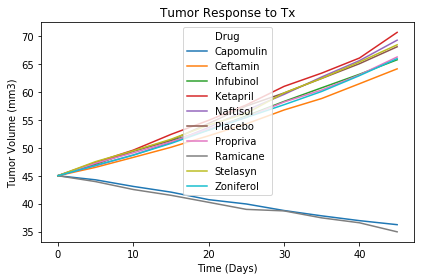

In [116]:
# Generate the Plot (with Error Bars)
#x_axis=np.arange(0,)
# Save the Figure
xTime= np.arange(max(drugByTimepoint.index))
#capolmulin=plt.plot(xTime,drugByTimepoint['Capomulin'], label="Capomulin")

drugByTimepoint.plot()
#pltdrugByTimepoint
plt.title("Tumor Response to Tx")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

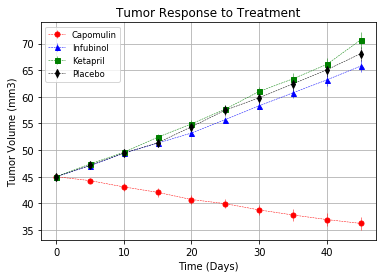

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [122]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metSites=combinedCSV[['Drug','Timepoint','Metastatic Sites']]
#metSites
meanMetSitesbyDrugTimepoint=metSites.groupby(['Drug','Timepoint']).mean()
# # Convert to DataFrame
meanMetSitesbyDrugTimepointDf=pd.DataFrame(meanMetSitesbyDrugTimepoint)
# # Preview DataFrame
meanMetSitesbyDrugTimepointDf.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [124]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semMetSites=metSites.groupby(['Drug','Timepoint']).sem()
# Convert to DataFrame
semMetSitesDf=pd.DataFrame(semMetSites)
# Preview DataFrame
semMetSitesDf.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [127]:
# Minor Data Munging to Re-Format the Data Frames
drugByTimepointMetSites=meanMetSitesbyDrugTimepointDf.groupby(['Timepoint','Drug'])['Metastatic Sites'].first().unstack(fill_value='')
# Preview that Reformatting worked

drugByTimepointMetSites.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


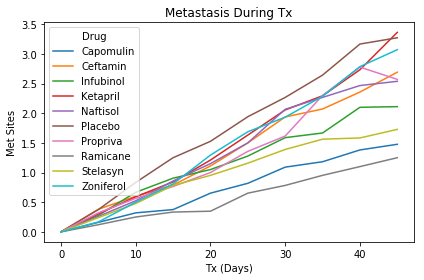

In [128]:
# Generate the Plot (with Error Bars)
#xTime= np.arange(max(drugByTimepoint.index))
# Save the Figure

# Show the Figure

#capolmulin=plt.plot(xTime,drugByTimepoint['Capomulin'], label="Capomulin")


drugByTimepointMetSites.plot()
#pltdrugByTimepoint
plt.title("Metastasis During Tx")
plt.ylabel('Met Sites')
plt.xlabel('Tx (Days)')
plt.tight_layout()

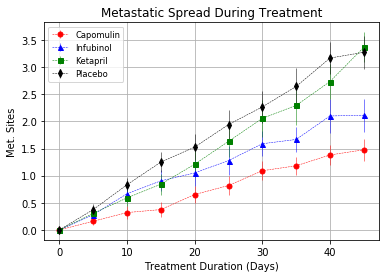

## Survival Rates

In [144]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#mouseCount=
#mice=combinedCSV[['Drug','Timepoint','Mouse ID']]
mouseCountbyDrugTimepoint=mice.groupby(['Drug','Timepoint']).count()
# Convert to DataFrame
mouseCountbyDrugTimepointDf=pd.DataFrame(mouseCountbyDrugTimepoint)
#mice

# Preview DataFrame
mouseCountbyDrugTimepointDf=mouseCountbyDrugTimepointDf.rename(columns={'Mouse ID':'Mouse Count'})
mouseCountbyDrugTimepointDf.head(5)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [147]:
# Minor Data Munging to Re-Format the Data Frames
drugByTimepointMouseCounts=mouseCountbyDrugTimepointDf.groupby(['Timepoint','Drug'])['Mouse Count'].first().unstack(fill_value='')
# Preview the Data Frame
drugByTimepointMouseCounts

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


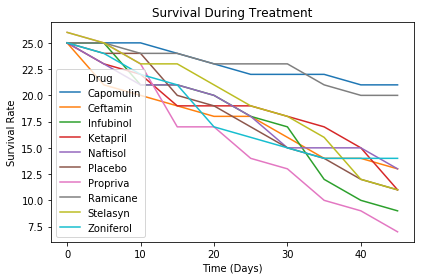

In [146]:
# Generate the Plot (Accounting for percentages)
drugByTimepointMouseCounts.plot()
#pltdrugByTimepoint
plt.title("Survival During Treatment")
plt.ylabel('Survival Rate')
plt.xlabel('Time (Days)')
plt.tight_layout()
# Save the Figure

# Show the Figure
plt.show()

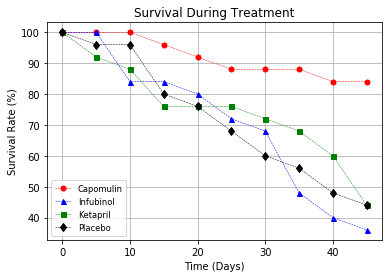

## Summary Bar Graph

In [228]:
# Calculate the percent changes for each drug
#use tumor size
#%change=endsize-startsize/startsize
#ResetmTumorVolumeDF=mTumorVolumeDF.reset_index()

#np.where(ResetmTumorVolumeDF['Timepoint']== 45
theDrug=[]
# theStart=[]
theEnd=[]
#drugStartStopDf= pd.DataFrame(data=None, columns=['Drug','Start','End'])
#   df2 = pd.DataFrame(data=None, columns=df1.columns,index=df1.index)
#rowCounter4NewDF=0
for index, row in ResetmTumorVolumeDF.iterrows():
    #if row['Timepoint'] == 0:
        #drugStartStopDf.iloc[rowCounter4NewDF,drugStartStopDf.columns.get_loc('Drug')]=row['Timepoint']
        #drugStartStopDf.iloc[rowCounter4NewDF,drugStartStopDf.columns.get_loc('Start')]=row['Tumor Volume (mm3)']    
     #   print (row['Timepoint'], row['Tumor Volume (mm3)'])
        
    if row['Timepoint'] == 45:
        #drugStartStopDf.iloc[rowCounter4NewDF,drugStartStopDf.columns.get_loc('End')]=row['Tumor Volume (mm3)']
        #print (row['Timepoint'], row['Tumor Volume (mm3)'])
        theDrug.append(row['Drug'])
        theEnd.append(row['Tumor Volume (mm3)'])
        #rowCounter4NewDF = rowCounter4NewDF + 1
    
    
#ResetmTumorVolumeDF.head()
#Drug, Timepoint, Tumor Volume (mm3)

In [229]:
drugAndEndDf=pd.DataFrame(drugAndEnd, columns=['Drug','theEnd'])
drugAndEndDf
#%change=endsize-startsize/startsize

,Drug,theEnd
0,Capomulin,36.236114
1,Ceftamin,64.132421
2,Infubinol,65.755562
3,Ketapril,70.662958
4,Naftisol,69.265506
5,Placebo,68.084082
6,Propriva,66.258529
7,Ramicane,34.955595
8,Stelasyn,68.438310
9,Zoniferol,65.960888


In [233]:
#%change=endsize-startsize/startsize
percentChange=(drugAndEndDf['theEnd']-45)/45*100

In [256]:
percentChangeList=list(zip(drugAndEndDf['Drug'],percentChange))
percentChangeDf=pd.DataFrame(percentChangeList, columns=['Drug','theChange'])
percentChangeDf.dtypes


Drug          object
theChange    float64
dtype: object

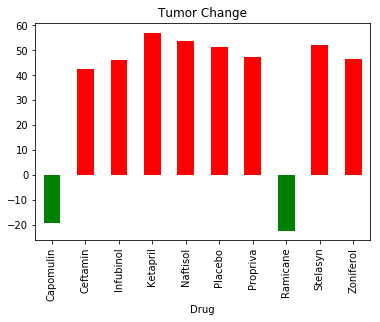

In [262]:
# mask1=y>0
# mask2=y<0

theColors = np.where(percentChangeDf['theChange']<0,'g','r')

percentChangeDf.plot(kind='bar',x='Drug', 
                     y='theChange', legend=False,
                     title="Tumor Change", color=theColors)


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

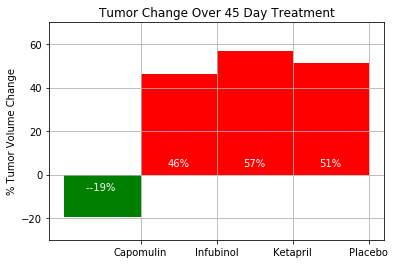

In [ ]:
#observations
#*Capomulin and Ramicane reduced tumor size
#*Capomulin and Ramicane had better survival rates
#*Capomulin and Ramicane had less metastasis
#* all other drugs had increase tumor, worse survival, and more metastatis